# Analisis Sentimen Ulasan Aplikasi Shopee di google play store Menggunakan Metode Klasifikasi Algoritma Naive Bayes

# scraping data

In [181]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Impor paket yang diperlukan

In [1]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [5]:
my_df = pd.read_csv('sentimen_shoope.csv')

In [183]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [184]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3abbd3b3-4539-4461-8527-cb4a2d0223e1,Brodin Gobet,https://play-lh.googleusercontent.com/a/AGNmyx...,Aplikasi pelayanannya sih ok... Cuma kalau aga...,4,498,2.98.30,2023-02-28 10:52:54,"Hai kak, maaf banget udah buat bingung, terkai...",2023-02-28 11:28:16
1,d2fbf44d-bec0-4dd1-9082-e90693136635,Moch Isako Yuda,https://play-lh.googleusercontent.com/a-/ACB-R...,Aplikasi nya Lemoott pdhl sdh sy Hapus Data & ...,1,533,2.98.30,2023-02-28 14:26:35,None,NaT
2,8ae6103b-9491-441e-ad2d-17c3a6ddb7fb,ratih chandra,https://play-lh.googleusercontent.com/a-/ACB-R...,"Super lag parah, suka ngfreeze, pdhl memory hp...",1,194,2.98.30,2023-03-02 07:29:57,"Hi Kak, maaf ya udah buat km nggak nyaman. mim...",2023-03-02 08:43:20
3,f4fe1c3e-1d95-43b2-8eae-7c28a664e817,Andry Bew,https://play-lh.googleusercontent.com/a-/ACB-R...,"Logout akun udah, hapus cache aplikasi udah, d...",1,36,2.98.23,2023-02-28 06:33:51,"Hi Kak, maaf bgt ya terait kendala aplikasinya...",2023-02-28 07:30:09
4,bade2b2d-8b49-4842-a724-426dc84abbdb,Qwerty Qwerty,https://play-lh.googleusercontent.com/a/AGNmyx...,Sebenarnya dalam belanja memang sangat terperc...,2,78,2.98.23,2023-02-26 03:48:04,Hallo kak mohon maaf buat km ganyaman. Terkait...,2023-02-26 04:43:53


In [185]:
len(df_busu.index) #kemudian hitung kembali berapa jumlah data yg didapatkan 

1000

In [186]:
df_busu[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Brodin Gobet,4,2023-02-28 10:52:54,Aplikasi pelayanannya sih ok... Cuma kalau aga...
1,Moch Isako Yuda,1,2023-02-28 14:26:35,Aplikasi nya Lemoott pdhl sdh sy Hapus Data & ...
2,ratih chandra,1,2023-03-02 07:29:57,"Super lag parah, suka ngfreeze, pdhl memory hp..."
3,Andry Bew,1,2023-02-28 06:33:51,"Logout akun udah, hapus cache aplikasi udah, d..."
4,Qwerty Qwerty,2,2023-02-26 03:48:04,Sebenarnya dalam belanja memang sangat terperc...


In [187]:
#Run This Code to Sort the Data By Date 

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
227,Adelia Putri,1,2023-03-03 16:04:40,Aplikasi lemot meski sudah diperbaharui dan su...
210,NP Sari,1,2023-03-03 02:08:00,"Kemuuu nenyeee??? HP Saya udah RAM 8gb, butuh ..."
17,Rachmad Junaidy,2,2023-03-02 15:30:59,Shopee fail untuk masalah pembayaran tagihan l...
279,Flaviana Olivia,1,2023-03-02 14:25:50,Pengiriman ekspedisi shopee kali ini sangat BU...
191,ALIESHA GHIBRAN,5,2023-03-02 14:15:05,"Applikasi sangat bagus, Alhamdulillah sudah da..."


In [188]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [189]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score. 


In [ ]:
my_df.head()

,content,score
227,Aplikasi lemot meski sudah diperbaharui dan su...,1
210,"Kemuuu nenyeee??? HP Saya udah RAM 8gb, butuh ...",1
17,Shopee fail untuk masalah pembayaran tagihan l...,2
279,Pengiriman ekspedisi shopee kali ini sangat BU...,1
191,"Applikasi sangat bagus, Alhamdulillah sudah da...",5


# PELABELAN

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
227,Aplikasi lemot meski sudah diperbaharui dan su...,1,Negatif
210,"Kemuuu nenyeee??? HP Saya udah RAM 8gb, butuh ...",1,Negatif
17,Shopee fail untuk masalah pembayaran tagihan l...,2,Negatif
279,Pengiriman ekspedisi shopee kali ini sangat BU...,1,Negatif
191,"Applikasi sangat bagus, Alhamdulillah sudah da...",5,Positif
195,"Sering bermasalah, padahal jaringan sudah bagu...",1,Negatif
188,Saya termasuk pengguna shopee dengan transaksi...,1,Negatif
948,Paket tidak sampai di ajukan pengembalian engg...,1,Negatif
225,Entah kenapa loading terus dan susah di buka l...,1,Negatif
11,Yang sekarang ga kaya dulu. Dulu masih enak pe...,1,Negatif


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)  #kemudian save menjadi file csv

# pembersihan data
# data cleaning

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,Aplikasi lemot meski sudah diperbaharui dan su...,1,Negatif
1,"Kemuuu nenyeee??? HP Saya udah RAM 8gb, butuh ...",1,Negatif
2,Shopee fail untuk masalah pembayaran tagihan l...,2,Negatif
3,Pengiriman ekspedisi shopee kali ini sangat BU...,1,Negatif
4,"Applikasi sangat bagus, Alhamdulillah sudah da...",5,Positif
5,"Sering bermasalah, padahal jaringan sudah bagu...",1,Negatif
6,Saya termasuk pengguna shopee dengan transaksi...,1,Negatif
7,Paket tidak sampai di ajukan pengembalian engg...,1,Negatif
8,Entah kenapa loading terus dan susah di buka l...,1,Negatif
9,Yang sekarang ga kaya dulu. Dulu masih enak pe...,1,Negatif


In [ ]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe, 
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    875 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,True
996,False,False,False
997,False,False,False
998,False,False,False


In [ ]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [ ]:
my_df.describe()

,score
count,1000.000000
mean,2.118000
std,1.419892
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5.000000


In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()  

content      0
score        0
Label      125
dtype: int64

# 1. Handling Missing value-Ignore tuple


In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.head(50)

,content,score,Label
0,Aplikasi lemot meski sudah diperbaharui dan su...,1,Negatif
1,"Kemuuu nenyeee??? HP Saya udah RAM 8gb, butuh ...",1,Negatif
2,Shopee fail untuk masalah pembayaran tagihan l...,2,Negatif
3,Pengiriman ekspedisi shopee kali ini sangat BU...,1,Negatif
4,"Applikasi sangat bagus, Alhamdulillah sudah da...",5,Positif
5,"Sering bermasalah, padahal jaringan sudah bagu...",1,Negatif
6,Saya termasuk pengguna shopee dengan transaksi...,1,Negatif
7,Paket tidak sampai di ajukan pengembalian engg...,1,Negatif
8,Entah kenapa loading terus dan susah di buka l...,1,Negatif
9,Yang sekarang ga kaya dulu. Dulu masih enak pe...,1,Negatif


In [ ]:
my_df.to_csv("shopeepreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan nama shopeepreprocessing.csv

# Text PreProcessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/shopeepreprocessing.csv')
df.head(50)

,content,score,Label
0,Aplikasi lemot meski sudah diperbaharui dan su...,1,Negatif
1,"Kemuuu nenyeee??? HP Saya udah RAM 8gb, butuh ...",1,Negatif
2,Shopee fail untuk masalah pembayaran tagihan l...,2,Negatif
3,Pengiriman ekspedisi shopee kali ini sangat BU...,1,Negatif
4,"Applikasi sangat bagus, Alhamdulillah sudah da...",5,Positif
5,"Sering bermasalah, padahal jaringan sudah bagu...",1,Negatif
6,Saya termasuk pengguna shopee dengan transaksi...,1,Negatif
7,Paket tidak sampai di ajukan pengembalian engg...,1,Negatif
8,Entah kenapa loading terus dan susah di buka l...,1,Negatif
9,Yang sekarang ga kaya dulu. Dulu masih enak pe...,1,Negatif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [6]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return my_df

In [7]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return my_df

In [8]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,"Hallo min, saya mau sedikit komplen soal kebij...",3,0,hallo min saya mau sedikit komplen soal kebija...
1,bisa gak sih gk usah muncul iklan terus tiap m...,1,-1,bisa gak sih gk usah muncul iklan terus tiap m...
2,kecewa sama ekspedisi shopee express. pesan ba...,2,-1,kecewa sama ekspedisi shopee express pesan baj...
3,"Aplikasinya banyak bug sekarang, nonton video ...",1,-1,aplikasinya banyak bug sekarang nonton video t...
4,"Sudah pelunasan dengan denda"" dibayarkan tetap...",1,-1,sudah pelunasan dengan denda dibayarkan tetap ...
5,"Sebenarnya udh nyaman blanja disini, tapi yg s...",4,1,sebenarnya udh nyaman blanja disini tapi yg sa...
6,Aplikasi ini sudah baik & mudah untuk memantau...,5,1,aplikasi ini sudah baik mudah untuk memantau ...
7,Selama ini saya belanja merasa puas walupun ad...,5,1,selama ini saya belanja merasa puas walupun ad...
8,halo shopee! ini kenapa ya apk sdh beberapa mi...,2,-1,halo shopee ini kenapa ya apk sdh beberapa min...
9,"Berat sekali dan terkadang suka blank, udah gi...",2,-1,berat sekali dan terkadang suka blank udah git...


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [9]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhaiminnur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,"Hallo min, saya mau sedikit komplen soal kebij...",3,0,hallo min saya mau sedikit komplen soal kebija...,hallo min komplen kebijakan shopee point memes...
1,bisa gak sih gk usah muncul iklan terus tiap m...,1,-1,bisa gak sih gk usah muncul iklan terus tiap m...,gak sih gk muncul iklan main game iklan ny keb...
2,kecewa sama ekspedisi shopee express. pesan ba...,2,-1,kecewa sama ekspedisi shopee express pesan baj...,kecewa ekspedisi shopee express pesan baju dip...
3,"Aplikasinya banyak bug sekarang, nonton video ...",1,-1,aplikasinya banyak bug sekarang nonton video t...,aplikasinya bug nonton video tibatiba ngefreez...
4,"Sudah pelunasan dengan denda"" dibayarkan tetap...",1,-1,sudah pelunasan dengan denda dibayarkan tetap ...,pelunasan denda dibayarkan data berubah jelek ...
5,"Sebenarnya udh nyaman blanja disini, tapi yg s...",4,1,sebenarnya udh nyaman blanja disini tapi yg sa...,udh nyaman blanja yg disayangkan voucher grati...
6,Aplikasi ini sudah baik & mudah untuk memantau...,5,1,aplikasi ini sudah baik mudah untuk memantau ...,aplikasi mudah memantau pesanan pertahankan be...
7,Selama ini saya belanja merasa puas walupun ad...,5,1,selama ini saya belanja merasa puas walupun ad...,belanja puas walupun yg mengecewakankarena ula...
8,halo shopee! ini kenapa ya apk sdh beberapa mi...,2,-1,halo shopee ini kenapa ya apk sdh beberapa min...,halo shopee ya apk sdh minggu beranda muncul m...
9,"Berat sekali dan terkadang suka blank, udah gi...",2,-1,berat sekali dan terkadang suka blank udah git...,berat terkadang suka blank udah gitu pas masuk...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [10]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhaiminnur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"Hallo min, saya mau sedikit komplen soal kebij...",3,0,hallo min saya mau sedikit komplen soal kebija...,hallo min komplen kebijakan shopee point memes...,"[hallo, min, komplen, kebijakan, shopee, point..."
1,bisa gak sih gk usah muncul iklan terus tiap m...,1,-1,bisa gak sih gk usah muncul iklan terus tiap m...,gak sih gk muncul iklan main game iklan ny keb...,"[gak, sih, gk, muncul, iklan, main, game, ikla..."
2,kecewa sama ekspedisi shopee express. pesan ba...,2,-1,kecewa sama ekspedisi shopee express pesan baj...,kecewa ekspedisi shopee express pesan baju dip...,"[kecewa, ekspedisi, shopee, express, pesan, ba..."
3,"Aplikasinya banyak bug sekarang, nonton video ...",1,-1,aplikasinya banyak bug sekarang nonton video t...,aplikasinya bug nonton video tibatiba ngefreez...,"[aplikasinya, bug, nonton, video, tibatiba, ng..."
4,"Sudah pelunasan dengan denda"" dibayarkan tetap...",1,-1,sudah pelunasan dengan denda dibayarkan tetap ...,pelunasan denda dibayarkan data berubah jelek ...,"[pelunasan, denda, dibayarkan, data, berubah, ..."


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

4890
------------------------
1 : hallo : hallo
2 : min : min
3 : komplen : komplen
4 : kebijakan : bijak
5 : shopee : shopee
6 : point : point
7 : memesan : mes
8 : cod : cod
9 : jasa : jasa
10 : pengiriman : kirim
11 : nya : nya
12 : spx : spx
13 : barang : barang
14 : cabang : cabang
15 : kirim : kirim
16 : pulau : pulau
17 : pertengahan : tengah
18 : mentok : mentok
19 : minggu : minggu
20 : telatudah : telatudah
21 : gitu : gitu
22 : penjualandengan : penjualandengan
23 : keteranganpaket : keteranganpaket
24 : kembalikan : kembali
25 : pengirim : kirim
26 : penerima : terima
27 : paketpadahal : paketpadahal
28 : paket : paket
29 : aja : aja
30 : ngak : ngak
31 : lihat : lihat
32 : wujud : wujud
33 : apanah : apanah
34 : sya : sya
35 : hran : hran
36 : sopi : sopi
37 : non : non
38 : aktif : aktif
39 : gak : gak
40 : sih : sih
41 : gk : gk
42 : muncul : muncul
43 : iklan : iklan
44 : main : main
45 : game : game
46 : ny : ny
47 : kebanyakan : banyak
48 : pas : pas
49 : selesai : se

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,"Hallo min, saya mau sedikit komplen soal kebij...",3,0,hallo min saya mau sedikit komplen soal kebija...,hallo min komplen kebijakan shopee point memes...,"[hallo, min, komplen, kebijakan, shopee, point...",hallo min komplen bijak shopee point mes cod j...
1,bisa gak sih gk usah muncul iklan terus tiap m...,1,-1,bisa gak sih gk usah muncul iklan terus tiap m...,gak sih gk muncul iklan main game iklan ny keb...,"[gak, sih, gk, muncul, iklan, main, game, ikla...",gak sih gk muncul iklan main game iklan ny ban...
2,kecewa sama ekspedisi shopee express. pesan ba...,2,-1,kecewa sama ekspedisi shopee express pesan baj...,kecewa ekspedisi shopee express pesan baju dip...,"[kecewa, ekspedisi, shopee, express, pesan, ba...",kecewa ekspedisi shopee express pesan baju dip...
3,"Aplikasinya banyak bug sekarang, nonton video ...",1,-1,aplikasinya banyak bug sekarang nonton video t...,aplikasinya bug nonton video tibatiba ngefreez...,"[aplikasinya, bug, nonton, video, tibatiba, ng...",aplikasi bug nonton video tibatiba ngefreeze n...
4,"Sudah pelunasan dengan denda"" dibayarkan tetap...",1,-1,sudah pelunasan dengan denda dibayarkan tetap ...,pelunasan denda dibayarkan data berubah jelek ...,"[pelunasan, denda, dibayarkan, data, berubah, ...",lunas denda bayar data ubah jelek baca menungg...
5,"Sebenarnya udh nyaman blanja disini, tapi yg s...",4,1,sebenarnya udh nyaman blanja disini tapi yg sa...,udh nyaman blanja yg disayangkan voucher grati...,"[udh, nyaman, blanja, yg, disayangkan, voucher...",udh nyaman blanja yg sayang voucher gratis ong...
6,Aplikasi ini sudah baik & mudah untuk memantau...,5,1,aplikasi ini sudah baik mudah untuk memantau ...,aplikasi mudah memantau pesanan pertahankan be...,"[aplikasi, mudah, memantau, pesanan, pertahank...",aplikasi mudah pantau pesan tahan henti inovas...
7,Selama ini saya belanja merasa puas walupun ad...,5,1,selama ini saya belanja merasa puas walupun ad...,belanja puas walupun yg mengecewakankarena ula...,"[belanja, puas, walupun, yg, mengecewakankaren...",belanja puas walupun yg mengecewakankarena ula...
8,halo shopee! ini kenapa ya apk sdh beberapa mi...,2,-1,halo shopee ini kenapa ya apk sdh beberapa min...,halo shopee ya apk sdh minggu beranda muncul m...,"[halo, shopee, ya, apk, sdh, minggu, beranda, ...",halo shopee ya apk sdh minggu beranda muncul m...
9,"Berat sekali dan terkadang suka blank, udah gi...",2,-1,berat sekali dan terkadang suka blank udah git...,berat terkadang suka blank udah gitu pas masuk...,"[berat, terkadang, suka, blank, udah, gitu, pa...",berat terkadang suka blank udah gitu pas masuk...


In [13]:
data_clean.to_csv('hasil_TextPreProcessing_shopee_v1.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [14]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [15]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

pembobotan tf-idf

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800,)
(800,)
(200,)
(200,)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [19]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


MultinomialNB()

In [21]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y_pred = nb.predict(tfidf_test)


In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="micro"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="micro"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="micro"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_shopee_v1.csv')

#


MultinomialNB Accuracy: 0.73
MultinomialNB Precision: 0.73
MultinomialNB Recall: 0.73
MultinomialNB f1_score: 0.7299999999999999
confusion_matrix:
 [[97  1  6]
 [17  1  5]
 [22  3 48]]

              precision    recall  f1-score   support

          -1       0.71      0.93      0.81       104
           0       0.20      0.04      0.07        23
           1       0.81      0.66      0.73        73

    accuracy                           0.73       200
   macro avg       0.58      0.54      0.54       200
weighted avg       0.69      0.73      0.69       200



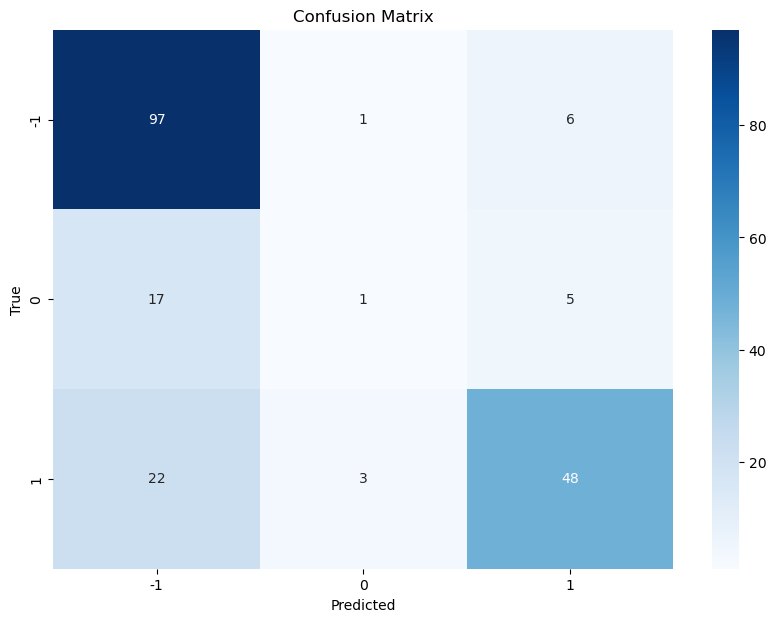

In [29]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Menghitung confusion matrix  
cm = confusion_matrix(y_test, predicted)  

# Plotting confuson matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))  
plt.xlabel('Predicted')  
plt.ylabel('True')  
plt.title('Confusion Matrix')  
plt.show()